Within this notebook, I will be using the dataset that contains data about the playgrounds in Pittsburgh.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

First I'll start by filtering out the necessary data from the dataset. Initially, I assumed that the necessary data would be the names of the parks and the neighborhoods they are located in. However, the dataset offered me the opportunity to broaden what I thought I'd be able to do, allowing me to also evaluate the safety of these playgrounds. I will be doing so by taking into consideration the surface type at these playgrounds, filtering out all the playgrounds that have null values under the field "safety surface type"

In [2]:
playgrounds= pd.read_csv("https://data.wprdc.org/datastore/dump/e39ef76e-0a11-47c8-a86f-a37f55db7a2b")
df = playgrounds[["id", "name", "neighborhood", "safety_surface_type" ]]
print(df)

             id                          name         neighborhood  \
0    1780722587          Able Long Playground            Beechview   
1     702514290         North Ave. Playground     Allegheny Center   
2    1267038491  Vietnam Veteran's Playground  Squirrel Hill South   
3      14898932  Schenley Overlook Playground  Squirrel Hill South   
4     204832406  Schenley Overlook Playground  Squirrel Hill South   
..          ...                           ...                  ...   
440  1301777506          Granville Playground     Crawford-Roberts   
441  1828281616          Granville Playground     Crawford-Roberts   
442   904290786  Spring Garden Ave Playground       East Allegheny   
443   370549255  Spring Garden Ave Playground       East Allegheny   
444   405052526  Spring Garden Ave Playground       East Allegheny   

       safety_surface_type  
0            Pour in Place  
1              SofSurfaces  
2              SofSurfaces  
3              SofSurfaces  
4             

In [3]:
dfsafe=df.dropna(subset=["safety_surface_type"])
print(dfsafe)
#filtering the playgrounds that don't have safe surfaces

             id                          name         neighborhood  \
0    1780722587          Able Long Playground            Beechview   
1     702514290         North Ave. Playground     Allegheny Center   
2    1267038491  Vietnam Veteran's Playground  Squirrel Hill South   
3      14898932  Schenley Overlook Playground  Squirrel Hill South   
4     204832406  Schenley Overlook Playground  Squirrel Hill South   
..          ...                           ...                  ...   
440  1301777506          Granville Playground     Crawford-Roberts   
441  1828281616          Granville Playground     Crawford-Roberts   
442   904290786  Spring Garden Ave Playground       East Allegheny   
443   370549255  Spring Garden Ave Playground       East Allegheny   
444   405052526  Spring Garden Ave Playground       East Allegheny   

       safety_surface_type  
0            Pour in Place  
1              SofSurfaces  
2              SofSurfaces  
3              SofSurfaces  
4             

In [9]:
dfsafe.groupby("neighborhood").count().loc[:,"name"]
#collecting the neighborhood field and counting how many times it appears in the dataset

neighborhood
Allegheny Center       15
Allentown               4
Banksville              6
Bedford Dwellings       3
Beechview              14
                       ..
Upper Lawrenceville     4
West End                3
West Oakland            1
Westwood                2
Windgap                 5
Name: name, Length: 67, dtype: int64

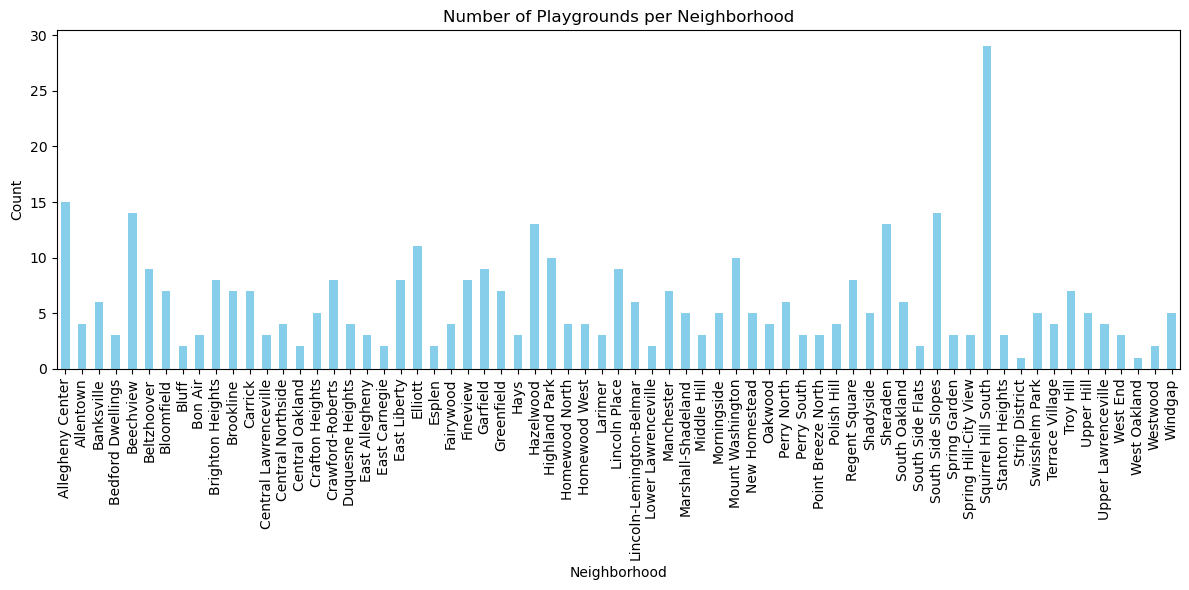

In [4]:
neighborhood_counts = dfsafe.groupby("neighborhood")["name"].count()
neighborhood_counts.plot(kind="bar", figsize=(12, 6), color='skyblue')
plt.title("Number of Playgrounds per Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Through the graph we can see that Squirrel Hill South has the most playgrounds by far but how many playgrounds do the next four neighborhoods have?

In [6]:
dffinal = dfsafe.groupby("neighborhood").count().loc[:, "name"]
top5 = dffinal.sort_values(ascending=False).head(5)
print(top5)

neighborhood
Squirrel Hill South    29
Allegheny Center       15
Beechview              14
South Side Slopes      14
Hazelwood              13
Name: name, dtype: int64
